<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center"> Introduction</p>
</div>

The datesets "kid_iq.csv" and child_iq.csv. They were sourced from Kaggles. These datasets can be used to analyse the relationship between maternal characteristics and children's IQ scores, providing insights into the factors that may influence cognitive development in children. This is an end-to-end  machine learning project

Column Description: The columns in each of the datasets are listed below:

Kids_iq dataset

 - kid_score:	Target variable. A measure of the child’s cognitive ability or IQ score.
 - mom_hs:	Binary indicator: whether the mother completed high school (1 = yes, 0 = no).
 - mom_iq:	Mother's IQ score — a continuous variable, typically standardized.
 - mom_work:	Binary indicator: whether the mother is working (1 = yes, 0 = no).
 - mom_age:	Mother's age at the time of the child's birth or data collection.

child_iq dataset
 - ppvt:	Peabody Picture Vocabulary Test score – a proxy for the child’s verbal ability or cognitive development. Often used in early childhood assessment.
 - educ_cat:	Mother's education category – usually an ordinal value (e.g., 1 = less than HS, 2 = HS grad, 3 = some college, 4 = college+).
 - momage: Mother's age at the time of the child's birth or data collection.

In [4]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

#from sklearn import set_config
#set_config(display='diagram')

In [5]:
# reading the datasets into pandas dataframe
df1 = pd.read_csv('kid_iq.csv')
df2 = pd.read_csv('child_iq.csv')

In [6]:
# displaying the first five rows of the kid iq dataset
df1.head()

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27


In [7]:
# displaying the first five rows of the child iq dataset
df2.head()

,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26


In [8]:
# dimension of the kid dataset
df1.shape

(434, 6)

In [9]:
# dimension of the child dataset
df2.shape

(400, 4)

In [10]:
# dataframe information for kid iq dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  434 non-null    int64  
 1   kid_score   434 non-null    int64  
 2   mom_hs      434 non-null    int64  
 3   mom_iq      434 non-null    float64
 4   mom_work    434 non-null    int64  
 5   mom_age     434 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 20.5 KB


In [11]:
# dataframe information for child iq dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  400 non-null    int64
 1   ppvt        400 non-null    int64
 2   educ_cat    400 non-null    int64
 3   momage      400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [12]:
# summary statistics of kid iq dataset
df1.describe()

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,217.500000,86.797235,0.785714,100.000000,2.896313,22.785714
std,125.429263,20.410688,0.410799,15.000000,1.181394,2.701070
min,1.000000,20.000000,0.000000,71.037405,1.000000,17.000000
25%,109.250000,74.000000,1.000000,88.660321,2.000000,21.000000
50%,217.500000,90.000000,1.000000,97.915254,3.000000,23.000000
75%,325.750000,102.000000,1.000000,110.272742,4.000000,25.000000
max,434.000000,144.000000,1.000000,138.893106,4.000000,29.000000


In [13]:
# summary statistics of child iq dataset
df2.describe()

,Unnamed: 0,ppvt,educ_cat,momage
count,400.000000,400.000000,400.000000,400.000000
mean,200.500000,86.932500,2.112500,22.790000
std,115.614301,20.440094,0.813325,2.689607
min,1.000000,20.000000,1.000000,17.000000
25%,100.750000,74.000000,2.000000,21.000000
50%,200.500000,90.000000,2.000000,23.000000
75%,300.250000,102.000000,3.000000,25.000000
max,400.000000,144.000000,4.000000,29.000000


In [14]:
# function to display an overview of the dataset
def create_dataset_summary(df):
    """
    Generates a summary DataFrame containing information about
    count, nulls, cardinality, data types,
    and duplicates for a given pandas DataFrame.
    """
    summary = pd.DataFrame({
        'Count': df.shape[0],
        'Nulls': df.isnull().sum(),
        'Cardinality': df.nunique(),
        'Data type': df.dtypes,
        'Duplicates': df.duplicated().sum(),
        'Min value': df.min(numeric_only=False).apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x),
        'Max value': df.max(numeric_only=False).apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    })
    return summary

In [15]:
# overview of the kid iq dataset
create_dataset_summary(df1)

,Count,Nulls,Cardinality,Data type,Duplicates,Min value,Max value
Unnamed: 0,434,0,434,int64,0,1.00,434.00
kid_score,434,0,85,int64,0,20.00,144.00
mom_hs,434,0,2,int64,0,0.00,1.00
mom_iq,434,0,332,float64,0,71.04,138.89
mom_work,434,0,4,int64,0,1.00,4.00
mom_age,434,0,13,int64,0,17.00,29.00


In [16]:
# overview of the child dataset
create_dataset_summary(df2)

,Count,Nulls,Cardinality,Data type,Duplicates,Min value,Max value
Unnamed: 0,400,0,400,int64,0,1,400
ppvt,400,0,84,int64,0,20,144
educ_cat,400,0,4,int64,0,1,4
momage,400,0,13,int64,0,17,29


The Kid IQ dataset contains 434 rows and 6 columns, while the Child IQ dataset has 400 rows and 4 columns. All columns in both datasets are numeric. The columns 'Unnamed: 0' and 'momage'/'mom_age' are common to both and could potentially be used for merging. However, using 'Unnamed: 0' would result in mismatched mother ages between the datasets. In contrast, the 'mom_age' column in Kid IQ and the 'momage' column in Child IQ share identical unique values and age ranges, making them ideal for joining the datasets. As 'Unnamed: 0' appears to be irrelevant, it will be dropped.

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Data Cleaning</p>
</div>

Cleaning operations to be performed on each dataset separately include:

 - Dropping irrelevant columns
 - Checking for and removing duplicate records
 - Identifying and handling outliers
 - Renaming the column 'momage' to 'mom_age' in the second dataset (df2)

# Cleaning Dataframe 1 (df1)

## Dropping irrelevant column

In [22]:
# dataframe information for kid iq dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  434 non-null    int64  
 1   kid_score   434 non-null    int64  
 2   mom_hs      434 non-null    int64  
 3   mom_iq      434 non-null    float64
 4   mom_work    434 non-null    int64  
 5   mom_age     434 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 20.5 KB


In [23]:
# dropping irrelevant column column
df1 = df1.drop(columns=('Unnamed: 0'))

## Checking for and removing duplicate records

In [25]:
# checking for duplicate
df1.duplicated().sum()

1

In [26]:
# dropping duplicates
df1 = df1.drop_duplicates()

In [27]:
# confirming the duplicate has been dropped
df1.duplicated().sum()

0

## Identifying and handling outliers

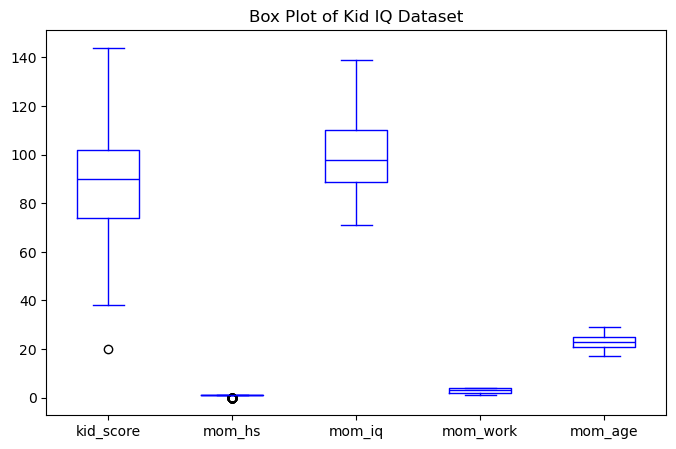

In [29]:
# checking for outliers in the kid iq dataset
plt.figure(figsize=(8, 5))
box = df1.boxplot(color='blue')  # single color for all boxes and whiskers
plt.grid(False)                  # turn off grid lines
plt.title("Box Plot of Kid IQ Dataset")
plt.show()

In [30]:
# number of outliers in the 'kind_score' column
len(df1[df1['kid_score'] < 25])

1

In [31]:
# identifying the outlier record
df1[df1['kid_score'] < 25]

,kid_score,mom_hs,mom_iq,mom_work,mom_age
285,20,0,83.533119,2,23


In [32]:
# unique values in the mom_hs column
df1['mom_hs'].unique()

array([1, 0], dtype=int64)

In [33]:
# number of unique values in the mom_hs column
df1['mom_hs'].nunique()

2

There is just one outlie in the kid_score column, though this may not impact the analysis, However it will be dropped. Also in the mom_hs column there are two unique values here '0' and '1', apprently there are no outlier in this column. So only the outlier in kid_score will be dropped.

In [35]:
# dropping the outlier in kid_score column
df1.drop(index=285, inplace=True)

In [36]:
# overview of the kid iq dataset
create_dataset_summary(df1)

,Count,Nulls,Cardinality,Data type,Duplicates,Min value,Max value
kid_score,432,0,84,int64,0,38.00,144.00
mom_hs,432,0,2,int64,0,0.00,1.00
mom_iq,432,0,331,float64,0,71.04,138.89
mom_work,432,0,4,int64,0,1.00,4.00
mom_age,432,0,13,int64,0,17.00,29.00


# Cleaning Dataframe 2 (df2)

## Dropping irrelevant column

In [39]:
# dropping the 'Unnamed: 0' column
df2 = df2.drop(columns=('Unnamed: 0'))

## Checking for and removing duplicate records

In [41]:
# checking for duplicate
df2.duplicated().sum()

50

In [42]:
# dropping duplicates
df2 = df2.drop_duplicates()

## Identifying and handling outliers

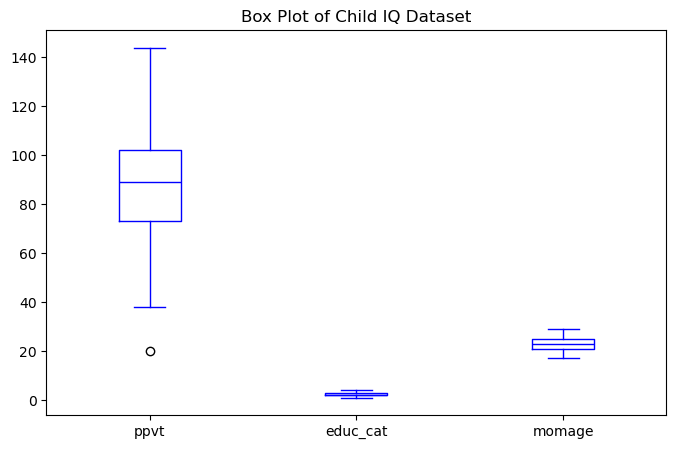

In [44]:
# checking for outliers in the child iq dataset
plt.figure(figsize=(8, 5))
box = df2.boxplot(color='blue')  # single color for all boxes and whiskers
plt.grid(False)                  # turn off grid lines
plt.title("Box Plot of Child IQ Dataset")
plt.show()

In [45]:
# number of outliers in the 'ppvt' column
len(df2[df2['ppvt'] < 25])

1

In [46]:
# identifying the outlier
df2[df2['ppvt'] < 25]

,ppvt,educ_cat,momage
354,20,1,23


In [47]:
# dropping the outlier in child dataset
df2.drop(index=354, inplace=True)

## Renaming the column 'momage' to 'mom_age' in df2

In [49]:
# Rename the column momage to mom_age
df2 = df2.rename(columns={'momage': 'mom_age'})

In [50]:
# join both dataset on the age of the mother
df = pd.merge(df1, df2, on='mom_age', how='inner')

In [51]:
# overview of the merged dataset
create_dataset_summary(df)

,Count,Nulls,Cardinality,Data type,Duplicates,Min value,Max value
kid_score,15099,0,84,int64,0,38.00,144.00
mom_hs,15099,0,2,int64,0,0.00,1.00
mom_iq,15099,0,331,float64,0,71.04,138.89
mom_work,15099,0,4,int64,0,1.00,4.00
mom_age,15099,0,13,int64,0,17.00,29.00
ppvt,15099,0,83,int64,0,38.00,144.00
educ_cat,15099,0,4,int64,0,1.00,4.00


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Exploratory Data Analysis</p>
</div>

Discrete Variables: ['mom_hs', 'mom_work', 'mom_age', 'educ_cat']
Continuous Variables: ['kid_score', 'mom_iq', 'ppvt']


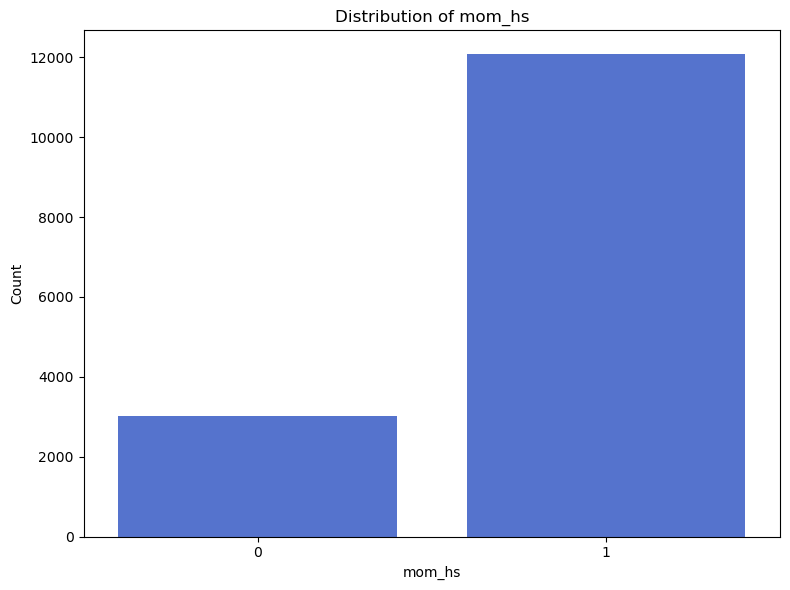

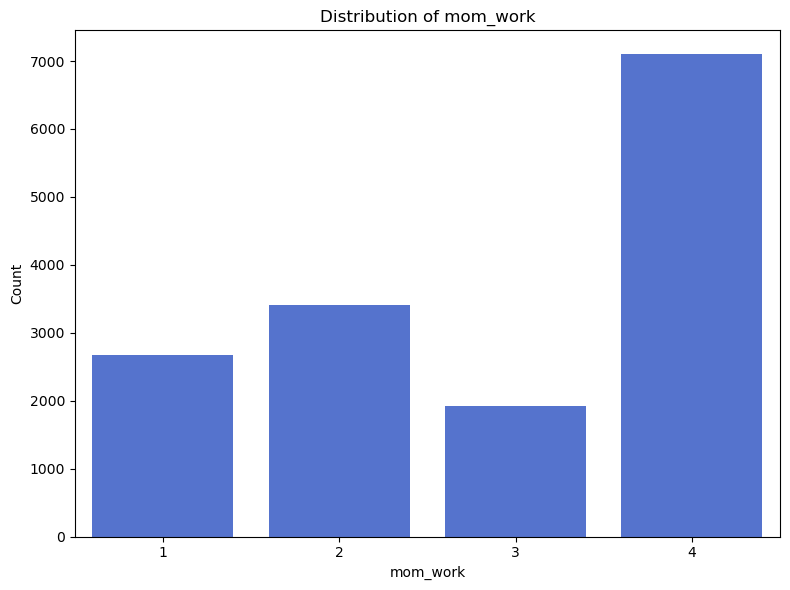

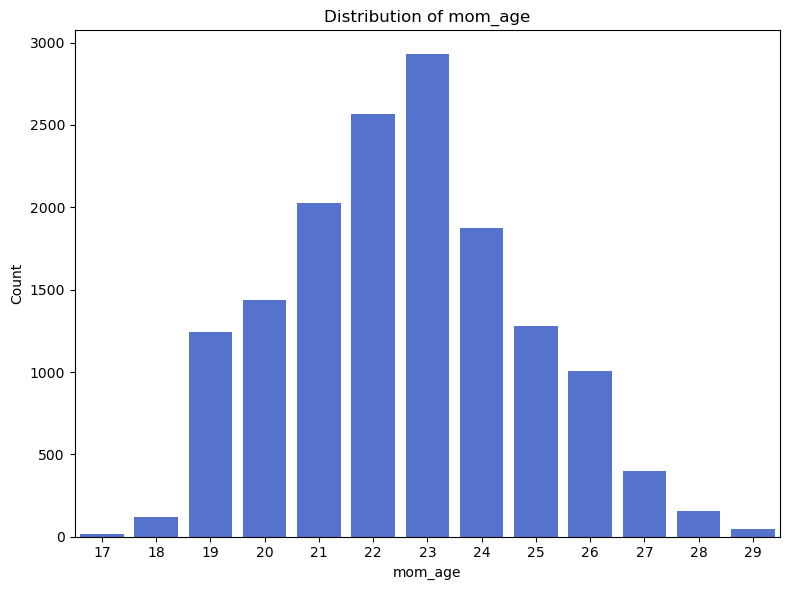

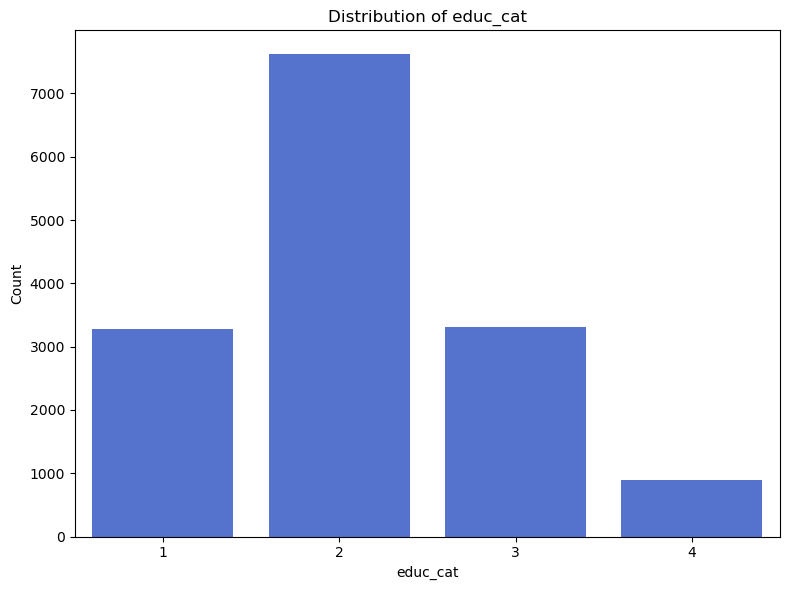

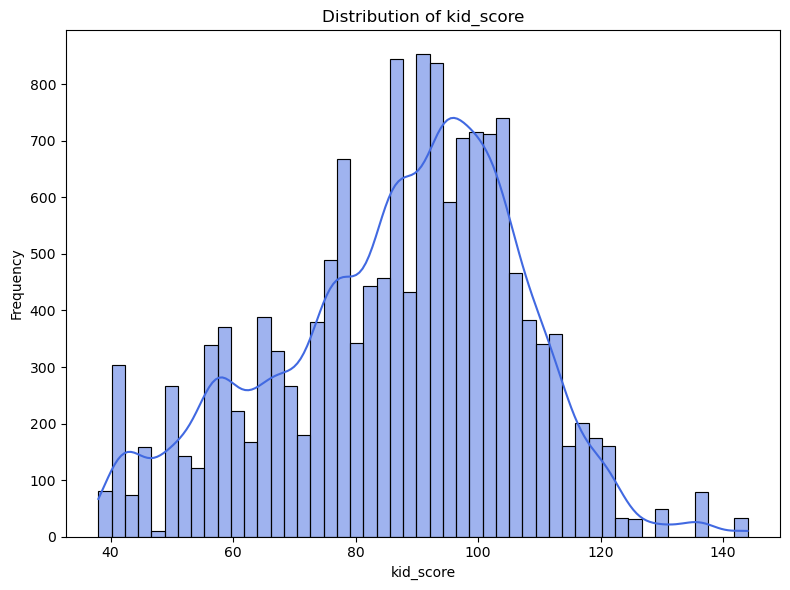

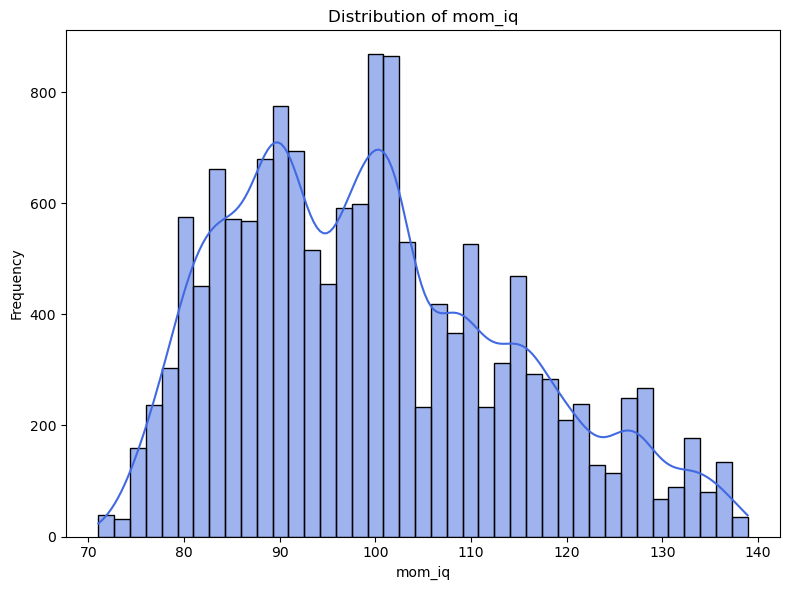

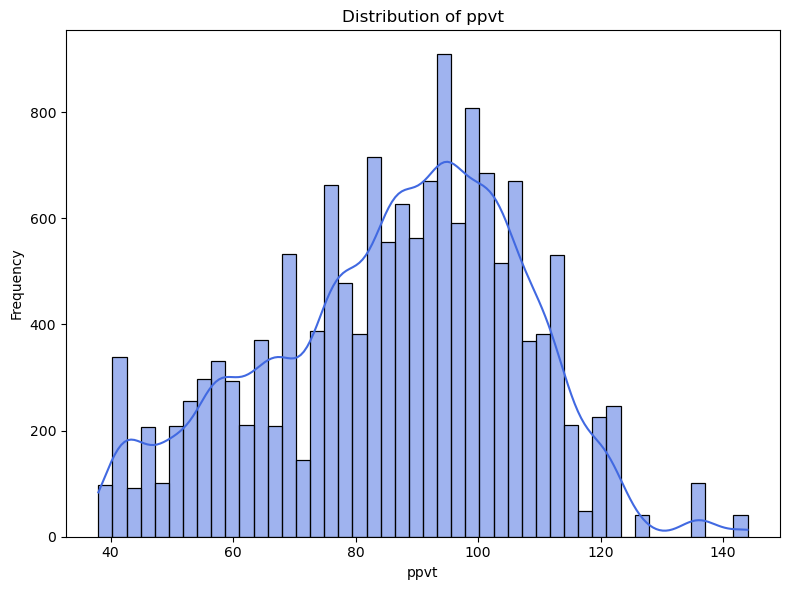

In [53]:
# Initialize lists to hold discrete and continuous variable names
discrete_vars = []
continuous_vars = []

# Define a single color to use for all plots
plot_color = '#4169E1'

# Loop through all columns to classify as discrete or continuous
for column in df.columns:
    unique_values = df[column].nunique()
    total_values = df.shape[0]

    # Heuristic: if unique values < 10 or less than 5% of total rows, treat as discrete
    if unique_values / total_values < 0.005 or unique_values < 5:
        discrete_vars.append(column)
    else:
        continuous_vars.append(column)

# Display the identified variable types
print("Discrete Variables:", discrete_vars)
print("Continuous Variables:", continuous_vars)

# Plot count plots for discrete variables
for var in discrete_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df, color=plot_color)  # Single color for all bars
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Plot histogram + KDE for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True, color=plot_color)  # Single color
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


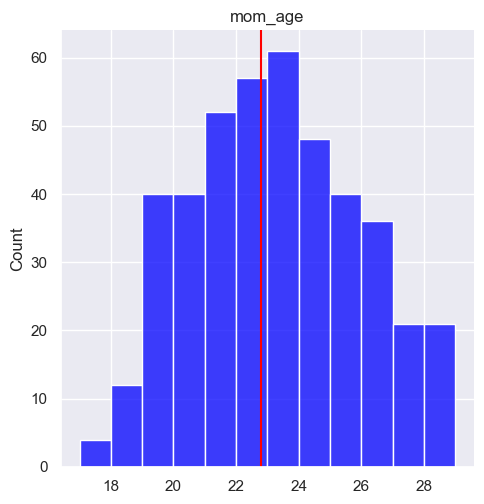

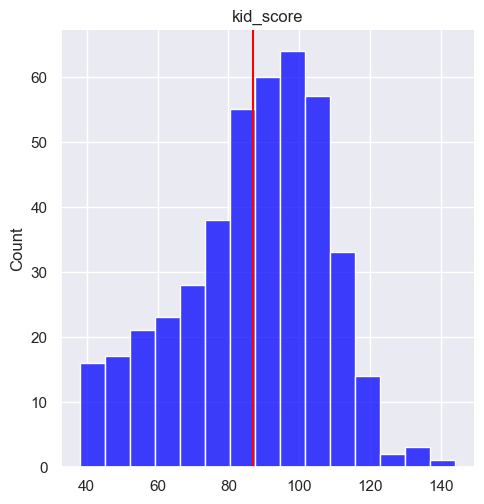

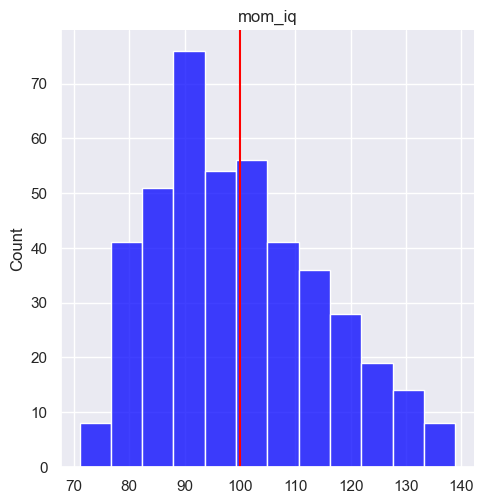

In [54]:
# Investigating the distribution of all fields, adding the mean

n_variables = ['mom_age', 'kid_score', 'mom_iq']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for n in n_variables:
    x = df1[n].values
    sns.displot(x, color = 'blue');

    # Calculating the mean
    mean = df1[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

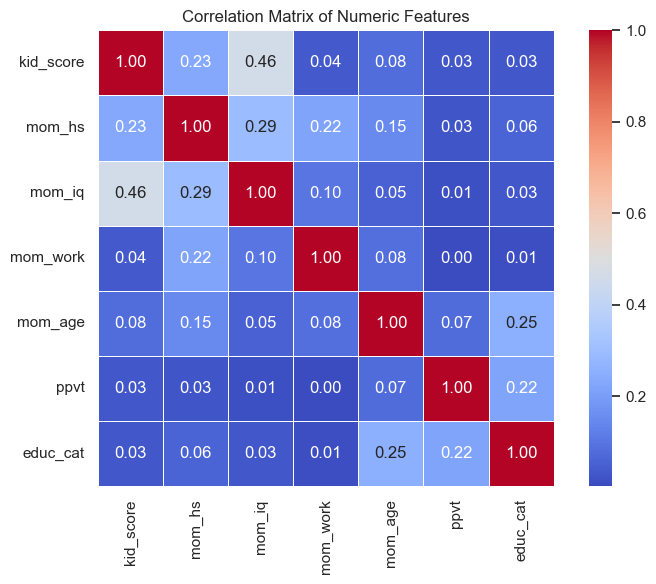

In [55]:
# Compute the correlation matrix (only numeric columns)
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Title and layout
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

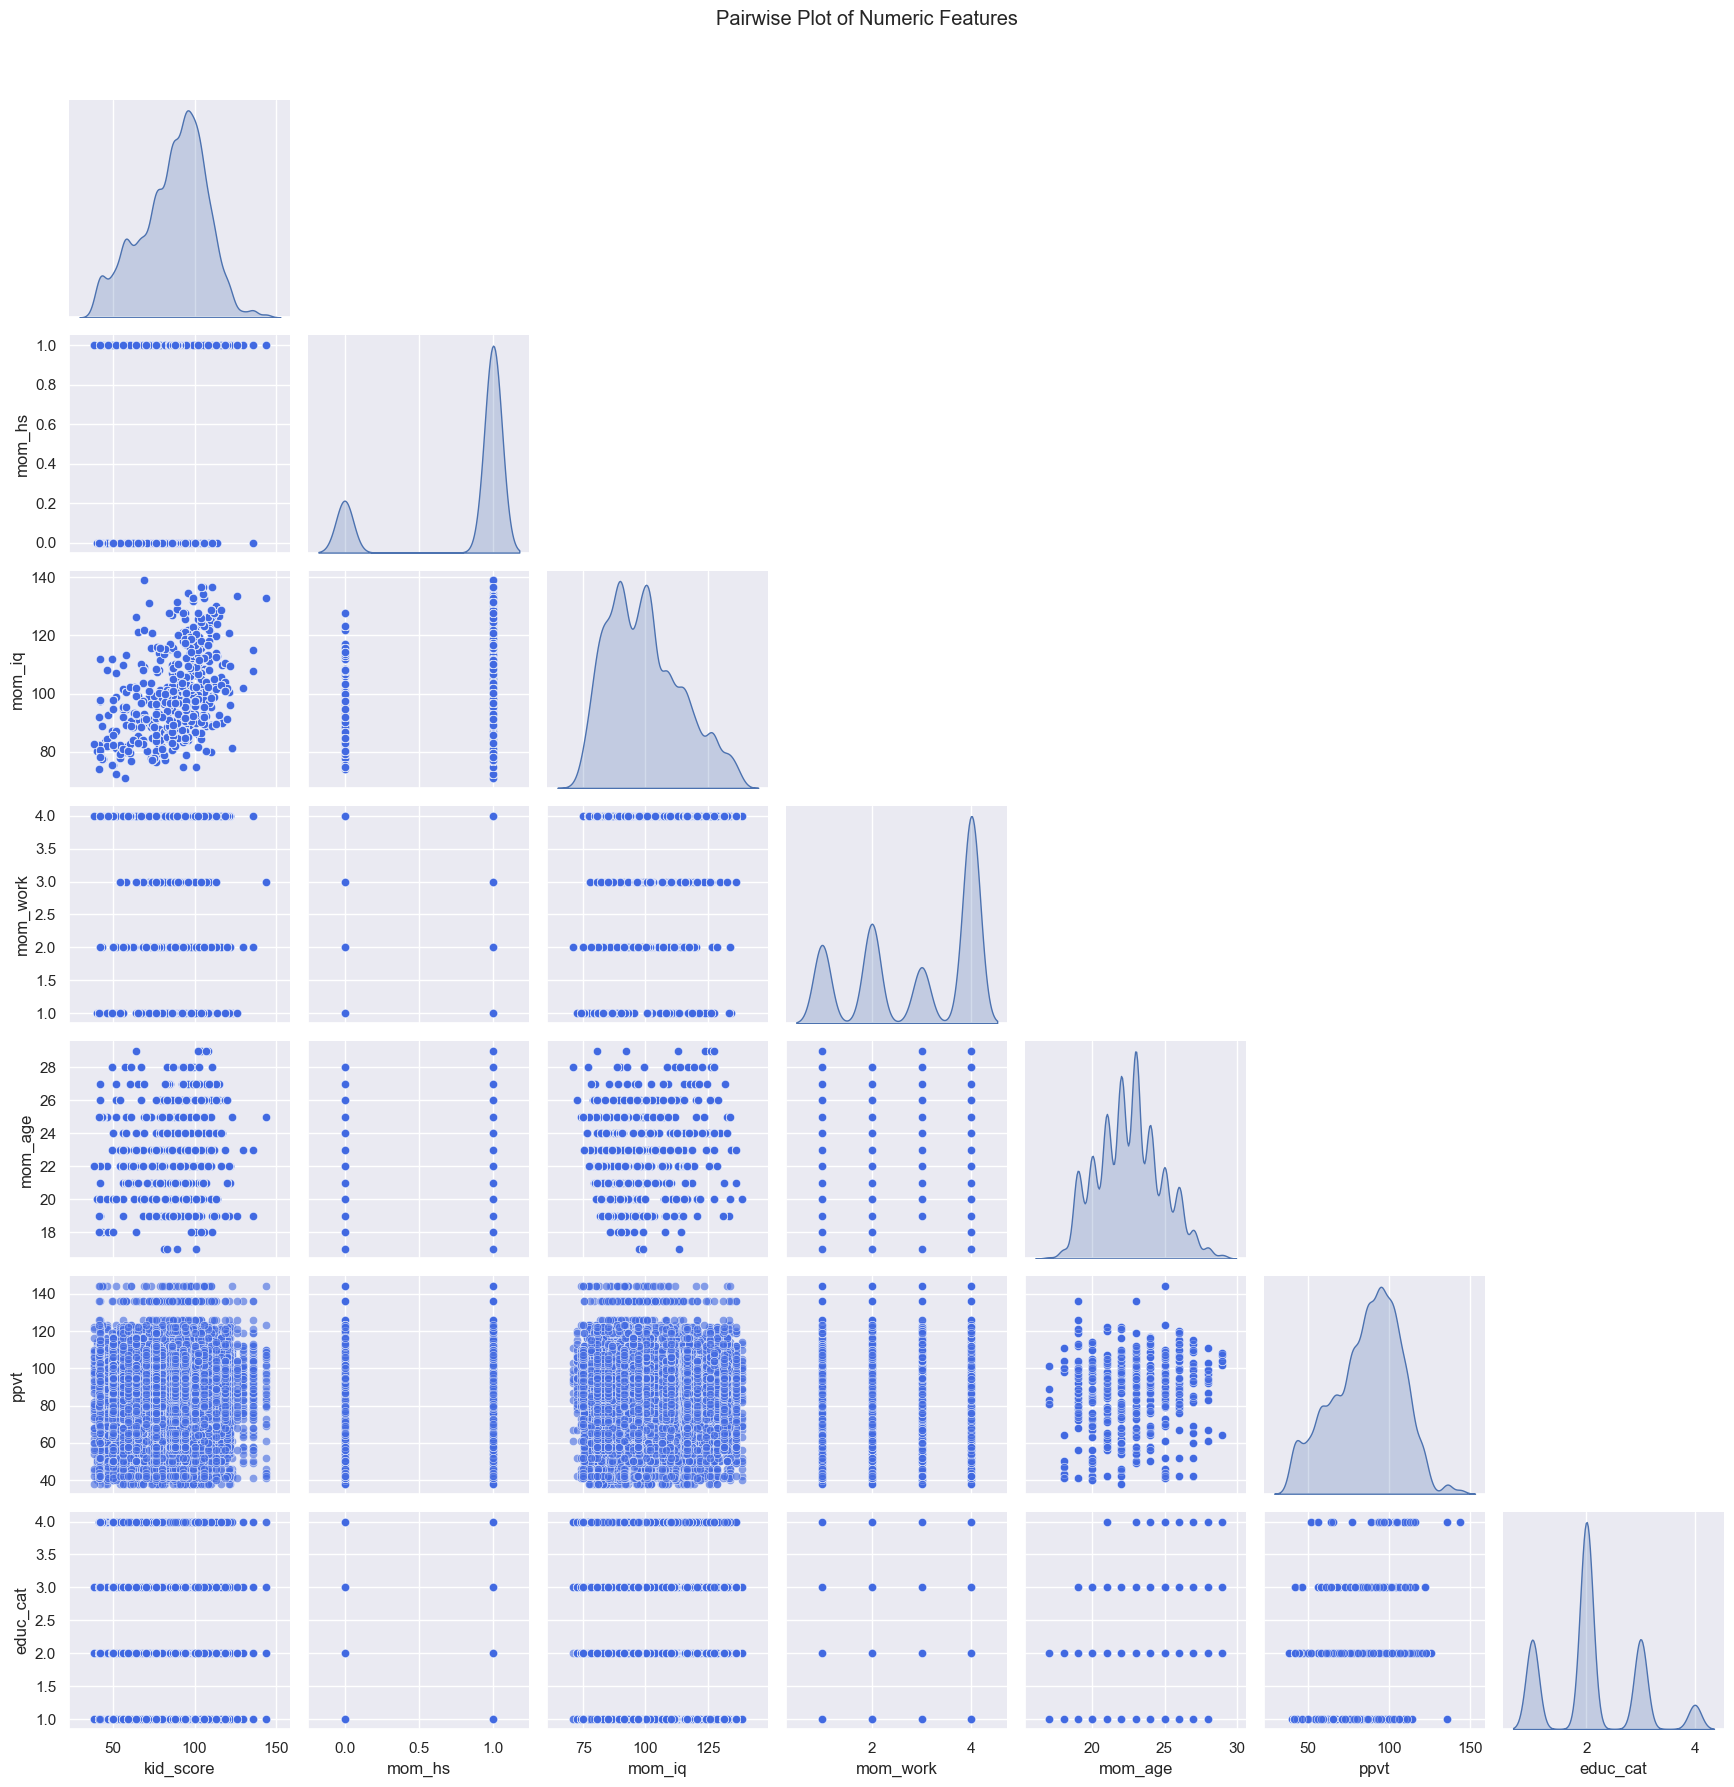

In [56]:
# Create a pairwise scatter plot matrix for numeric columns
sns.pairplot(df, corner=True, diag_kind='kde', plot_kws={'alpha': 0.6, 'color': '#4169E1'})
plt.suptitle("Pairwise Plot of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

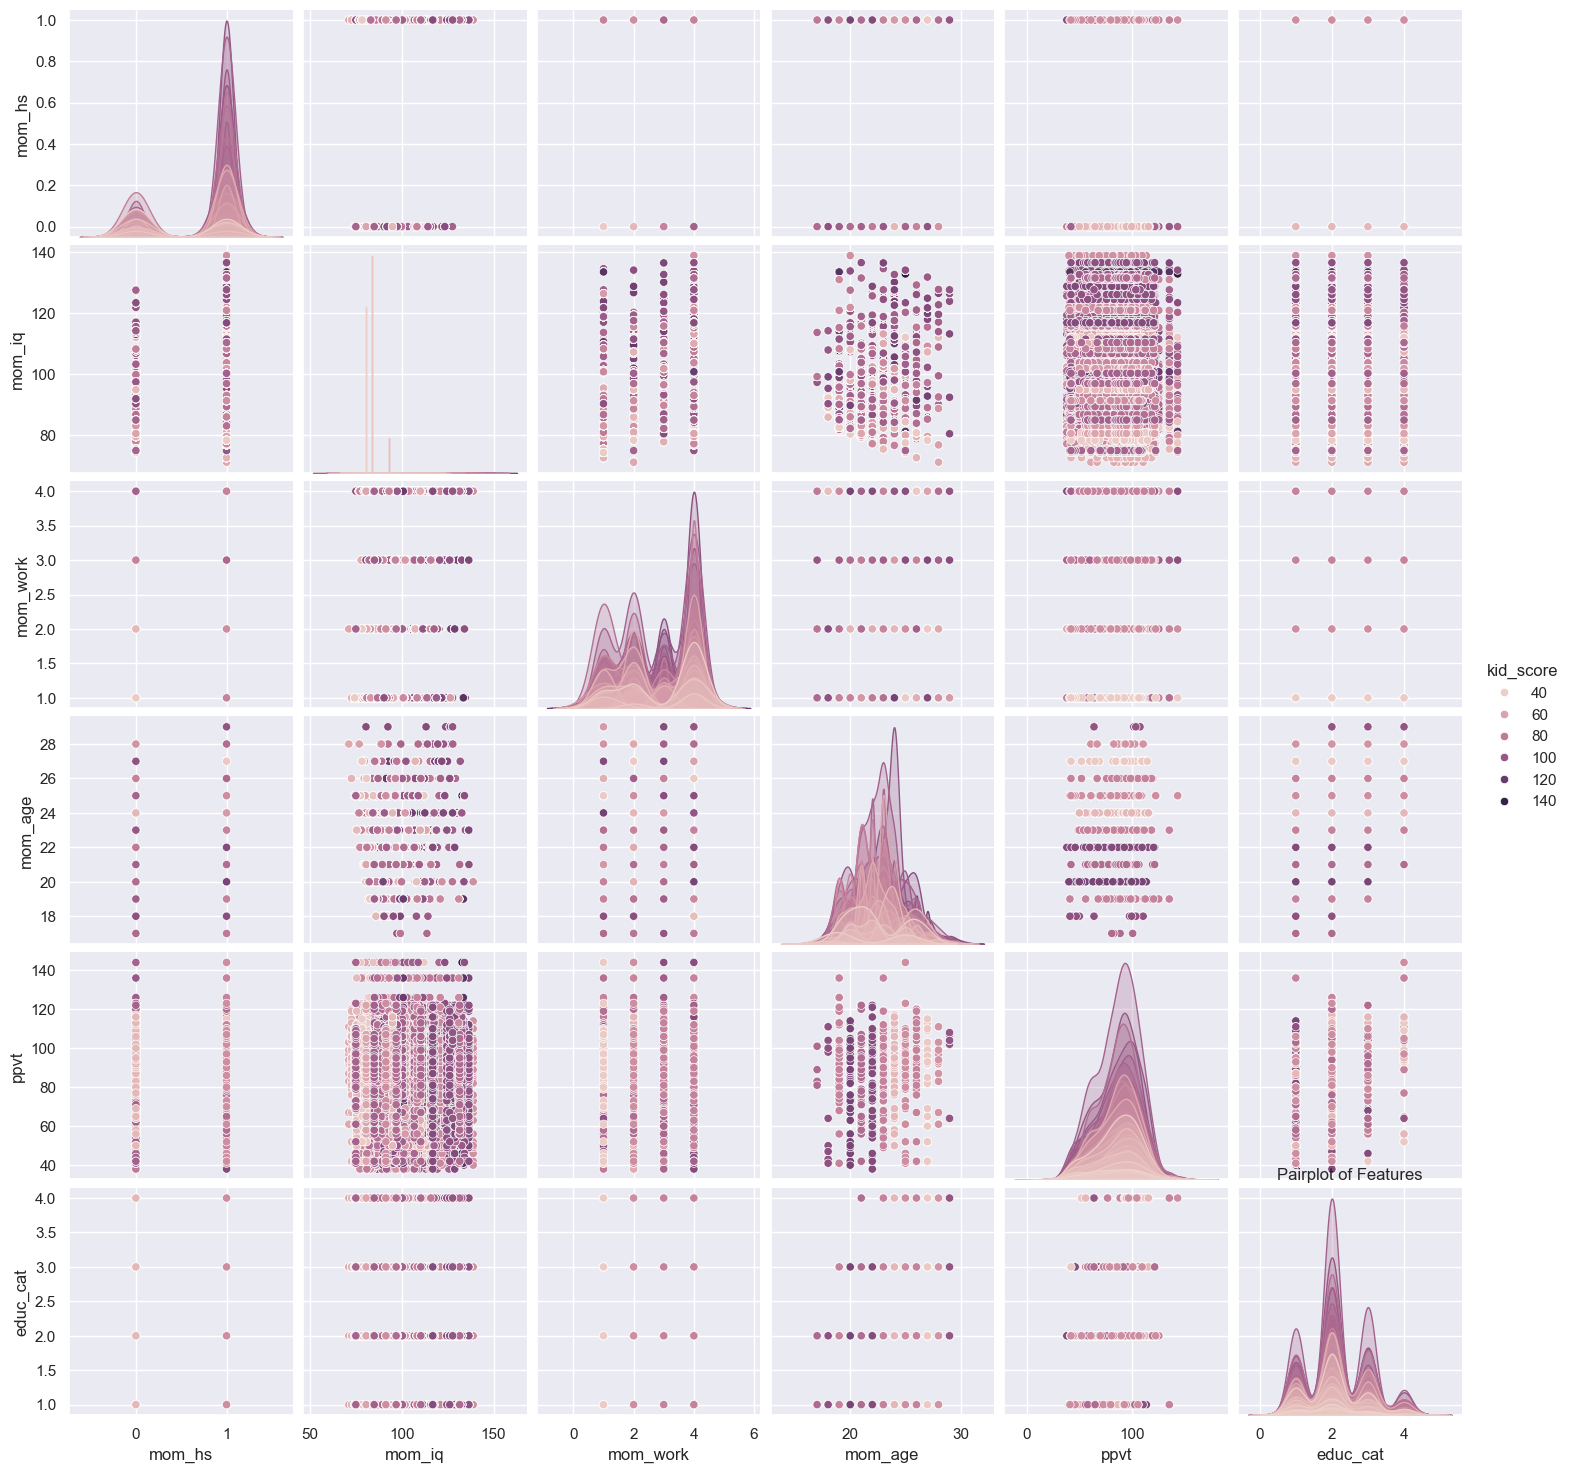

In [57]:
# Pairplot to visualize relationships with kid score
sns.pairplot(df, hue='kid_score')
plt.title('Pairplot of Features')
plt.show()

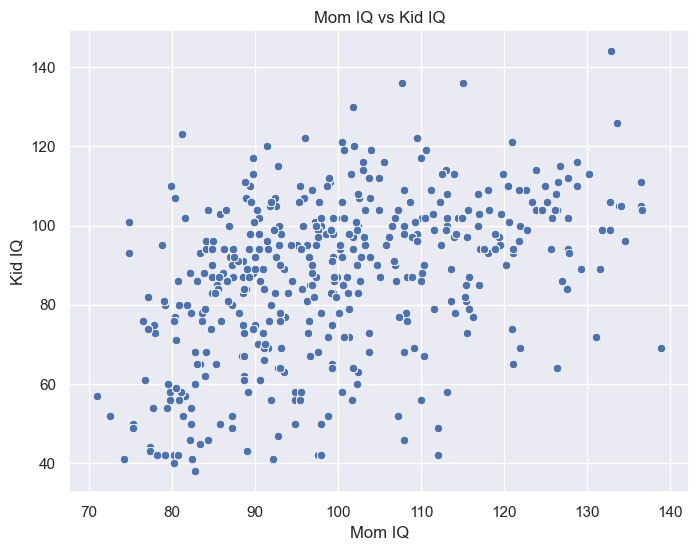

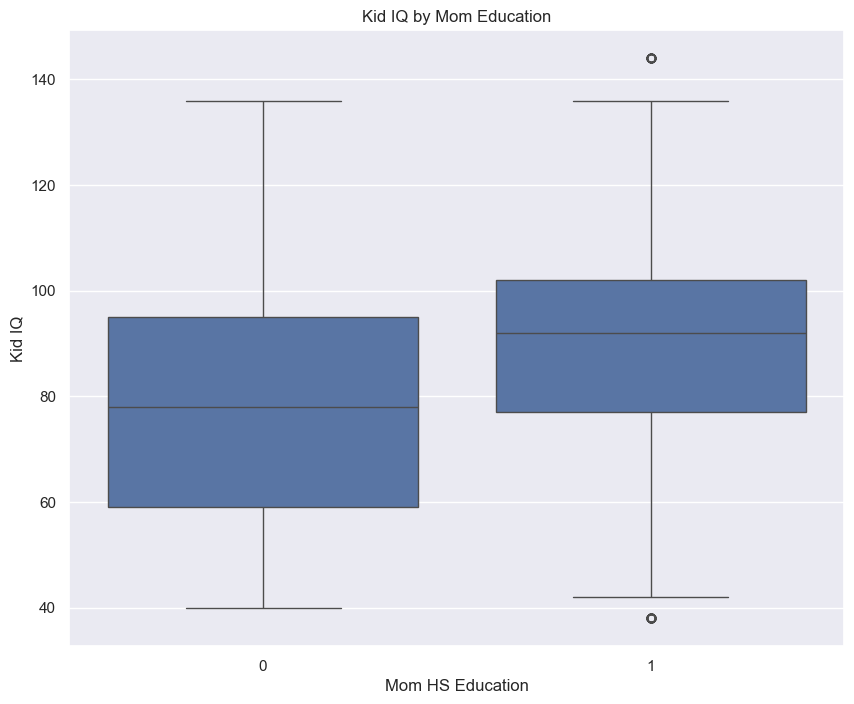

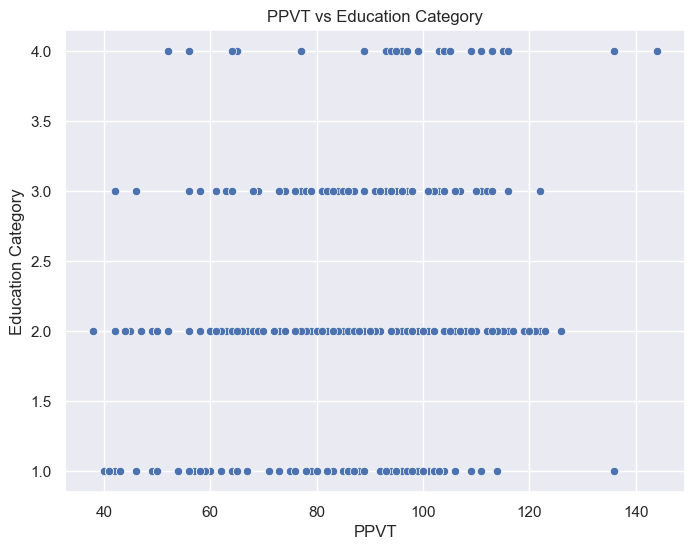

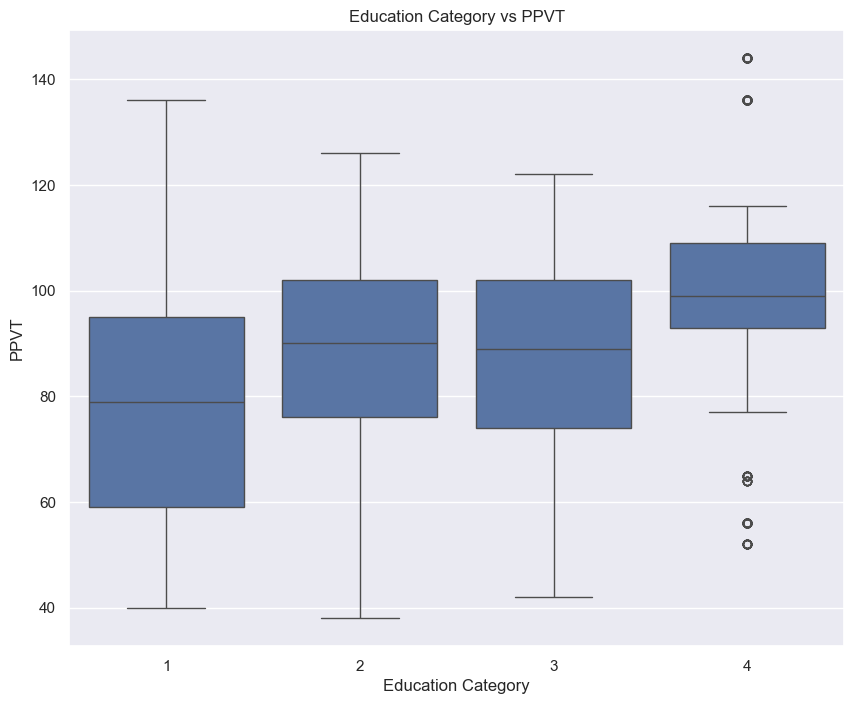

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mom_iq', y='kid_score', data=df)
plt.title('Mom IQ vs Kid IQ')
plt.xlabel('Mom IQ')
plt.ylabel('Kid IQ')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='mom_hs', y='kid_score', data=df)
plt.title('Kid IQ by Mom Education')
plt.xlabel('Mom HS Education')
plt.ylabel('Kid IQ')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ppvt', y='educ_cat', data=df)
plt.title('PPVT vs Education Category')
plt.xlabel('PPVT')
plt.ylabel('Education Category')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='educ_cat', y='ppvt', data=df)
plt.title('Education Category vs PPVT')
plt.xlabel('Education Category')
plt.ylabel('PPVT')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Feature Engineering</p>
</div>

Two new features were created from the merged datasets and they are 'mom_age_group' and 'mom_iq_score' as seen below

In [61]:
# creating mom_iq_group column
df['mom_age_group'] = pd.cut(df['mom_age'], bins=[0, 20, 30], labels=['Teenager', 'Twenties'], right=False)

In [62]:
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,ppvt,educ_cat,mom_age_group
0,65,1,121.117529,4,27,84,2,Twenties
1,65,1,121.117529,4,27,101,3,Twenties
2,65,1,121.117529,4,27,109,4,Twenties
3,65,1,121.117529,4,27,82,3,Twenties
4,65,1,121.117529,4,27,113,4,Twenties


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15099 entries, 0 to 15098
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   kid_score      15099 non-null  int64   
 1   mom_hs         15099 non-null  int64   
 2   mom_iq         15099 non-null  float64 
 3   mom_work       15099 non-null  int64   
 4   mom_age        15099 non-null  int64   
 5   ppvt           15099 non-null  int64   
 6   educ_cat       15099 non-null  int64   
 7   mom_age_group  15099 non-null  category
dtypes: category(1), float64(1), int64(6)
memory usage: 840.7 KB


In [64]:
# checking for duplicates
df.duplicated().sum()

0

In [65]:
# checking for null values
df.isnull().sum()

kid_score        0
mom_hs           0
mom_iq           0
mom_work         0
mom_age          0
ppvt             0
educ_cat         0
mom_age_group    0
dtype: int64

In [66]:
# Dropping mom_age and mom_iq to avoid multicollinearity and data leakage
#df = df.drop(columns=['mom_age', 'mom_iq'], inplace=True)

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">Data Preprocessing</p>
</div>

 A. Numerical Features
mom_iq, mom_age, ppvt, age_iq_interact, etc.
👉 Use StandardScaler() or MinMaxScaler() in a pipeline.

🔸 B. Categorical Features
Include:

mom_age_bin, mom_iq_range, mom_age_group, educ_cat (if it’s categorical)

👉 Use OneHotEncoder(handle_unknown='ignore') if using tree-based models.
👉 If using Linear Regression, avoid multicollinearity by setting drop='first'.

🔸 C. Binary Features
Already encoded: mom_hs, mom_work, young_mom, high_iq_mom
👉 These can be used as-is, no encoding needed.

In [69]:
# Define features & target
#X = df.drop('kid_score', axis=1)
X = df.drop(['kid_score', 'mom_age'], axis=1)
y = df['kid_score']


In [70]:
# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()


# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])



# Build Pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])


# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Get feature names from the preprocessor
# This works only if using scikit-learn 1.0+
from sklearn.compose import make_column_selector as selector

# Get transformed feature names
num_features = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine both
all_features = np.concatenate([num_features, cat_features])

# Convert to DataFrame
import pandas as pd

X_train_scaled_df = pd.DataFrame(X_train_transformed.toarray() if hasattr(X_train_transformed, 'toarray') else X_train_transformed,
                                 columns=all_features,
                                 index=X_train.index)

# View the first few rows
X_train_scaled_df.head()


,mom_hs,mom_iq,mom_work,ppvt,educ_cat,mom_age_group_Twenties
6920,0.503387,0.495202,-1.596612,0.662532,-1.375599,1.0
2485,0.503387,-0.616123,0.945969,-0.444465,-0.143973,1.0
11289,0.503387,1.063062,0.945969,-0.107553,-0.143973,0.0
11441,0.503387,-0.182127,0.945969,-0.059423,1.087652,1.0
303,0.503387,-0.742681,-1.596612,-0.636986,1.087652,1.0


In [72]:

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['mom_hs', 'mom_iq',
                                                   'mom_work', 'ppvt',
                                                   'educ_cat']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mom_age_group'])])),
                ('regressor', LinearRegression())])

In [73]:
y_pred = pipeline.predict(X_test)

In [74]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 320.0353842975045
R²: 0.2403691680308233


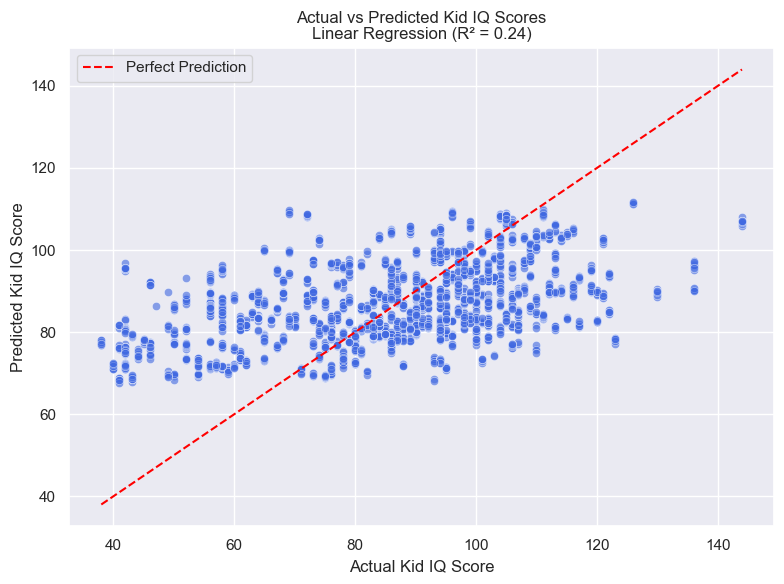

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

r2 = r2_score(y_test, y_pred)
plt.xlabel('Actual Kid IQ Score')
plt.ylabel('Predicted Kid IQ Score')
plt.title(f'Actual vs Predicted Kid IQ Scores\nLinear Regression (R² = {r2:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

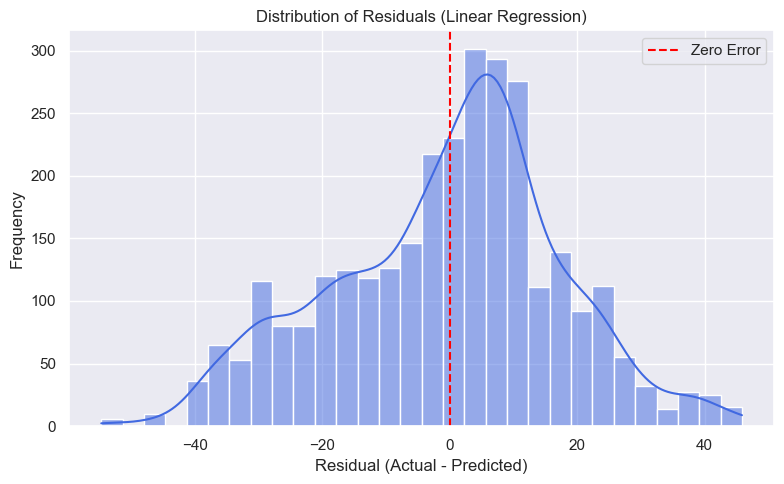

In [76]:
# compute residuals
residuals = y_test - y_pred

# Plot residual distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='royalblue', bins=30)

plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Linear Regression)')
plt.legend()
plt.tight_layout()
plt.show()

In [77]:


# Creating a dictionary of model to be run
# For GridSearchCV, we only need the base regressor here. The hyperparameters will be defined in param_grid.
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0, eval_metric='rmse') # eval_metric added for XGBoost to suppress warning
}

# --- Define Parameter Grids for Each Model ---
# This is where you specify the hyperparameter ranges to search
param_grids = {
    'Random Forest': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [10, 20, None],
        'regressor__min_samples_split': [2, 5],
        'regressor__max_features': ['sqrt', 'log2', None]  # Controls randomness
    },
    'Gradient Boosting': {
        'regressor__n_estimators': [50, 100, 150],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5],
        'regressor__subsample': [0.8, 1.0]  # Like XGBoost's
    },
    'XGBoost': {
        'regressor__n_estimators': [50, 100, 150],
        'regressor__learning_rate': [0.01, 0.1],
        'regressor__max_depth': [3, 5],
        'regressor__subsample': [0.8, 1.0],
        'regressor__colsample_bytree': [0.8, 1.0],  # Column sampling
        'regressor__gamma': [0, 1]  # Minimum loss reduction
    }
}

# creating a dictionary for the best model
best_models = {}

# --- Loop through models and perform GridSearchCV ---
for name, model in models.items():
    print(f"\n--- Running GridSearchCV for {name} ---")

    # Create pipeline (this remains the same)
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', model) # The regressor is the model from the dictionary
    ])

    # Get the specific parameter grid for the current model
    current_param_grid = param_grids[name]

    # Initialize GridSearchCV
    # cv: Number of folds for cross-validation (e.g., 5-fold CV)
    # scoring: Metric to optimize (e.g., 'neg_mean_squared_error' for MSE, 'r2' for R-squared)
    # n_jobs: Number of CPU cores to use (-1 means use all available)
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=current_param_grid,
        cv=5, # 5-fold cross-validation
        scoring='neg_mean_squared_error', # Optimize for MSE (negative because GridSearchCV maximizes)
        n_jobs=-1, # Use all available CPU cores
        verbose=1 # Print progress messages
    )

    # Train the GridSearchCV object
    grid_search.fit(X_train, y_train)

    # --- Display GridSearchCV Results ---
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation MSE for {name}: {-grid_search.best_score_:.2f}") # Convert back to positive MSE

    # --- Evaluate Best Model on Test Set ---
    # The best_estimator_ is the pipeline with the optimal hyperparameters
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display test set results
    print(f"\n{name} Results (on Test Set with Best Hyperparameters):")
    print(f"  MSE: {mse:.2f}")
    print(f"  R²:  {r2:.4f}")
    
    # Save results
    best_models[name] = {
        'model': best_pipeline,
        'mse': mse,
        'r2': r2
    }




--- Running GridSearchCV for Random Forest ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Random Forest: {'regressor__max_depth': 20, 'regressor__max_features': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Best cross-validation MSE for Random Forest: 35.88

Random Forest Results (on Test Set with Best Hyperparameters):
  MSE: 31.36
  R²:  0.9256

--- Running GridSearchCV for Gradient Boosting ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Gradient Boosting: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__n_estimators': 150, 'regressor__subsample': 1.0}
Best cross-validation MSE for Gradient Boosting: 31.63

Gradient Boosting Results (on Test Set with Best Hyperparameters):
  MSE: 27.88
  R²:  0.9338

--- Running GridSearchCV for XGBoost ---
Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'regressor__colsample_bytree': 1.0, 'regressor__gamma': 1, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 150, 'regressor__subsample': 0.8}
Best cross-validation MSE for XGBoost: 71.04

XGBoost Results (on Test Set with Best Hyperparameters):
  MSE: 64.03
  R²:  0.8480


In [79]:
# ------------------- 4. Select Best Model -------------------
best_model_name = min(best_models, key=lambda name: best_models[name]['mse'])
best_pipeline = best_models[best_model_name]['model']

print(f"\n>>> Best Model: {best_model_name}")
print(f"    MSE: {best_models[best_model_name]['mse']:.2f}")
print(f"    R²:  {best_models[best_model_name]['r2']:.4f}")

# ------------------- 5. Save the Best Model and Dataset -------------------
# Save model (includes preprocessing inside pipeline)
with open(f'{best_model_name.replace(" ", "_").lower()}_model.pkl', 'wb') as f:
    pickle.dump(best_pipeline, f)

# Save dataset
with open('dataset.pkl', 'wb') as f:
    pickle.dump({'X': X, 'y': y, 'df': df}, f)

print("\n✅ Best model and dataset saved as .pkl files.")


>>> Best Model: Gradient Boosting
    MSE: 27.88
    R²:  0.9338

✅ Best model and dataset saved as .pkl files.


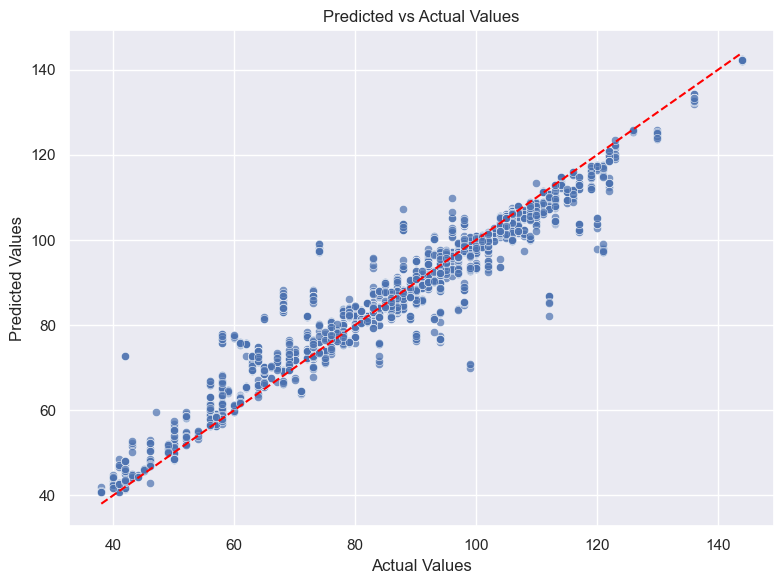

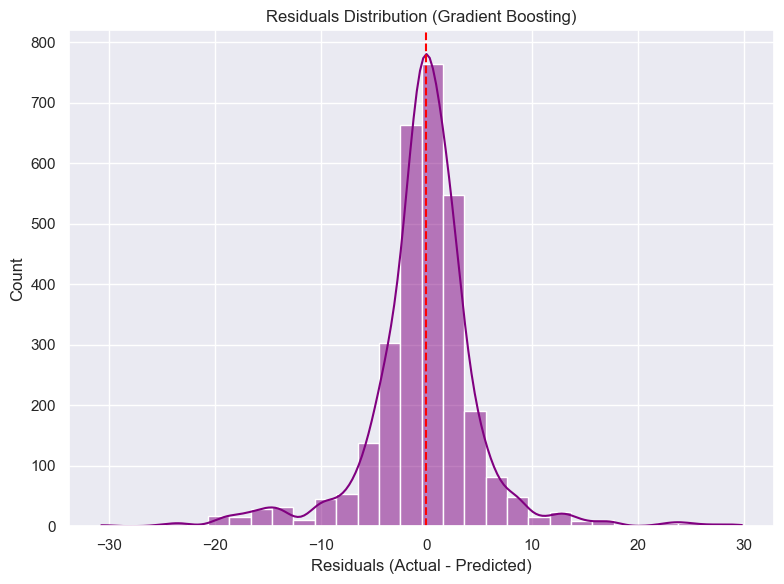

In [81]:

# --- Predict using the best model ---
y_pred = best_pipeline.predict(X_test)
residuals = y_test - y_pred

# --- 1. Predicted vs Actual Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Residual Histogram ---
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Actual - Predicted)")
plt.title(f"Residuals Distribution ({best_model_name})")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ignatiusebigwa_ysj\AppData\Local\Temp\4\ipykernel_9932\1835761509.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


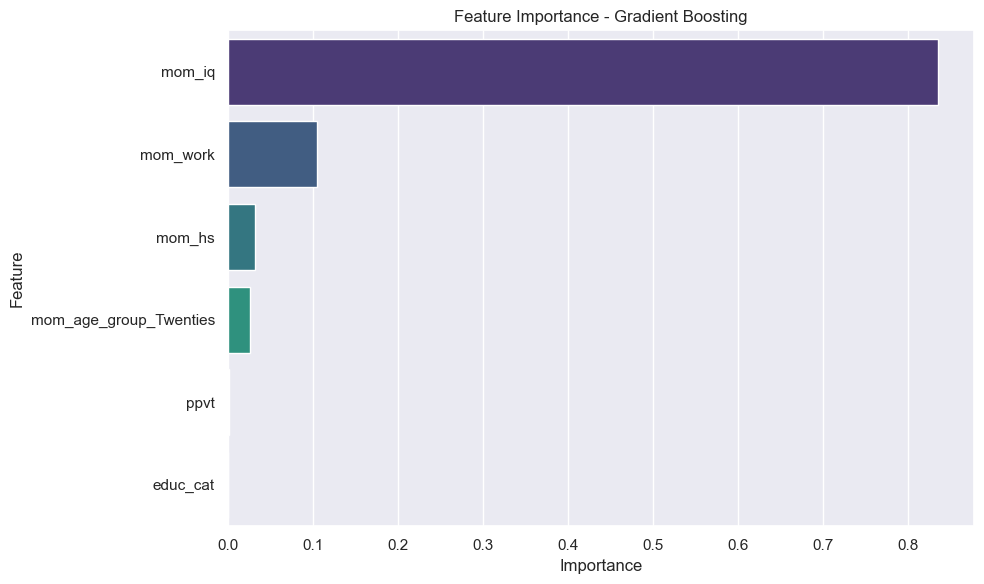

In [83]:
# Feature importance
# Get the trained regressor from the pipeline
regressor = best_pipeline.named_steps['regressor']

# Check if the regressor supports feature importance
if hasattr(regressor, 'feature_importances_'):

    # Access the preprocessing step from the pipeline
    preprocessor = best_pipeline.named_steps['preprocessing']

    # Get numeric feature names (original column names)
    num_features = preprocessor.transformers_[0][2]

    # Get encoded categorical feature names after OneHotEncoding
    cat_encoder = preprocessor.transformers_[1][1]  # OneHotEncoder instance
    cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)

    # Combine numeric and categorical feature names in the order they were passed to the model
    all_features = np.concatenate([num_features, cat_feature_names])

    # Create a DataFrame for easy sorting and plotting
    importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': regressor.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title(f"Feature Importance - {best_model_name}")
    plt.tight_layout()
    plt.show()

else:
    # If the regressor does not support feature importances (e.g., LinearRegression), show warning
    print(f"⚠️ The regressor '{best_model_name}' does not support feature importances.")


In [84]:
X.columns

Index(['mom_hs', 'mom_iq', 'mom_work', 'ppvt', 'educ_cat', 'mom_age_group'], dtype='object')

In [85]:
X.head()

,mom_hs,mom_iq,mom_work,ppvt,educ_cat,mom_age_group
0,1,121.117529,4,84,2,Twenties
1,1,121.117529,4,101,3,Twenties
2,1,121.117529,4,109,4,Twenties
3,1,121.117529,4,82,3,Twenties
4,1,121.117529,4,113,4,Twenties


In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15099 entries, 0 to 15098
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mom_hs         15099 non-null  int64   
 1   mom_iq         15099 non-null  float64 
 2   mom_work       15099 non-null  int64   
 3   ppvt           15099 non-null  int64   
 4   educ_cat       15099 non-null  int64   
 5   mom_age_group  15099 non-null  category
dtypes: category(1), float64(1), int64(4)
memory usage: 604.8 KB


In [87]:
import streamlit as st

# Function to gather user input for your dataset columns
def get_input():
    # Numeric inputs
    mom_hs = st.sidebar.number_input('Mother\'s High School Score (mom_hs)', min_value=0, max_value=1, step=1, value=0)
    mom_iq = st.sidebar.number_input('Mother\'s IQ (mom_iq)', min_value=50, max_value=160, step=1, value=100)
    mom_work = st.sidebar.number_input('Mother\'s Work Hours per Week (mom_work)', min_value=1, max_value=4, step=1, value=1)
    ppvt = st.sidebar.number_input('PPVT Score (ppvt)', min_value=0, max_value=200, step=1, value=100)
    educ_cat = st.sidebar.number_input('Mother\'s Education Category (educ_cat)', min_value=1, max_value=4, step=1, value=1)
    
    mom_age_group = st.sidebar.selectbox('Mother Age Group', ['Teenager', 'Twenties']
    )
    
    data = {
        'mom_hs': mom_hs,
        'mom_iq': mom_iq,
        'mom_work': mom_work,
        'ppvt': ppvt,
        'educ_cat':  educ_cat,
        'mom_age_group': mom_age_group
        #f'mom_age_group_{mom_age_group}': 'Teenager',
    }  
    return data

# Example usage
data = get_input()
data

2025-06-27 17:53:47.507 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


{'mom_hs': 0,
 'mom_iq': 100,
 'mom_work': 1,
 'ppvt': 100,
 'educ_cat': 1,
 'mom_age_group': 'Teenager'}

In [88]:
def prepare_input(data, feature_list):
    # For each feature in the expected list, get from data dict or use 0 if missing
    input_data = {feature: data.get(feature, 0) for feature in feature_list}
    # Return as 2D array (1 sample)
    return np.array([list(input_data.values())])

# List of features in the exact order your model expects
features = ['mom_hs', 'mom_iq', 'mom_work', 'ppvt', 'educ_cat', 'mom_age_group']

# Example usage:
input_array = prepare_input(data, features)
print(input_array)

[['0' '100' '1' '100' '1' 'Teenager']]


In [89]:
# Create DataFrame with one row
input_df = pd.DataFrame([data])
input_df

,mom_hs,mom_iq,mom_work,ppvt,educ_cat,mom_age_group
0,0,100,1,100,1,Teenager


In [90]:
prediction = best_pipeline.predict(input_df)
print("Predicted kid_score:", prediction[0])


Predicted kid_score: 98.61391149154299


In [96]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle
from PIL import Image

# Page configuration
st.set_page_config(layout="wide")

# Load your pre-trained pipeline (preprocessing + model)
with open('best_model_pipeline.pkl', 'rb') as f:
    model_pipeline = pickle.load(f)

image_sidebar = Image.open('Pic1.png')  # Replace with your image file
st.sidebar.image(image_sidebar, use_column_width=True)
st.sidebar.header('Mother and Child Features')

# Function to gather user input for your dataset columns
def get_input():
    # Numeric inputs
    mom_hs = st.sidebar.number_input('Mother\'s High School Score (mom_hs)', min_value=0, max_value=1, step=1, value=0)
    mom_iq = st.sidebar.number_input('Mother\'s IQ (mom_iq)', min_value=50, max_value=160, step=1, value=100)
    mom_work = st.sidebar.number_input('Mother\'s Work Hours per Week (mom_work)', min_value=1, max_value=4, step=1, value=1)
    ppvt = st.sidebar.number_input('PPVT Score (ppvt)', min_value=0, max_value=200, step=1, value=100)
    educ_cat = st.sidebar.number_input('Mother\'s Education Category (educ_cat)', min_value=1, max_value=4, step=1, value=1)
    
    mom_age_group = st.sidebar.selectbox('Mother Age Group', ['Teenager', 'Twenties']
    )
    
    data = {
        'mom_hs': mom_hs,
        'mom_iq': mom_iq,
        'mom_work': mom_work,
        'ppvt': ppvt,
        'educ_cat':  educ_cat,
        'mom_age_group': mom_age_group
        #f'mom_age_group_{mom_age_group}': 'Teenager',
    }  
    return data


# Top banner
image_banner = Image.open('Pic2.png')  # Replace with your image file
st.image(image_banner, use_column_width=True)


# Page title
st.markdown("<h1 style='text-align: center;'>Child IQ Prediction App</h1>", unsafe_allow_html=True)

# Split layout into two columns
left_col, right_col = st.columns(2)

# Left column: Feature Importance Interactive Bar Chart
with left_col:
    st.header("Feature Importance")

    # Create a DataFrame of features and importances
    final_fi = pd.DataFrame({
        'Variable': all_features,
        'Feature Importance Score': regressor.feature_importances_
    })

    # Sort for plotting
    final_fi_sorted = final_fi.sort_values(by='Feature Importance Score', ascending=True)

    # Create Plotly bar chart
    fig = px.bar(
        final_fi_sorted,
        x='Feature Importance Score',
        y='Variable',
        orientation='h',
        title=f"Feature Importance - {best_model_name}",
        labels={'Feature Importance Score': 'Importance', 'Variable': 'Feature'},
        text='Feature Importance Score',
        color_discrete_sequence=['#48a3b4']
    )

    fig.update_layout(
        xaxis_title="Feature Importance Score",
        yaxis_title="Variable",
        template="plotly_white",
        height=500
    )

    # Display in Streamlit
    st.plotly_chart(fig, use_container_width=True)

#else:
    #st.warning(f"⚠️ The regressor '{best_model_name}' does not support feature importances.")



# Right column: Prediction Interface
with right_col:
    st.header("Predict Vehicle Price")
    
    # User inputs from sidebar
    data = get_input()

    # Transform the input into the required format
    def prepare_input(data, feature_list):
        # For each feature in the expected list, get from data dict or use 0 if missing
        input_data = {feature: data.get(feature, 0) for feature in feature_list}
        # Return as 2D array (1 sample)
        return np.array([list(input_data.values())])
    
    # List of features in the exact order your model expects
    features = ['mom_hs', 'mom_iq', 'mom_work', 'ppvt', 'educ_cat', 'mom_age_group']
    
    # Prediction button
    if st.button("Predict Child's IQ"):
        prediction = model_pipeline.predict(input_df)
        st.subheader("Predicted Child IQ")
        st.write(f"{prediction[0]:.2f}")


# streamlit run Regr_model_cars.py









In [ ]:




# Collect user input
user_input = get_user_input()

# Prepare DataFrame for prediction
input_df = pd.DataFrame([user_input])

# Prediction button
if st.button("Predict Child's IQ"):
    prediction = model_pipeline.predict(input_df)
    st.subheader("Predicted Child IQ")
    st.write(f"{prediction[0]:.2f}")

# Optionally: show user input for verification
with st.expander("Show input features"):
    st.write(input_df)


